# Load Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import pyplot


In [2]:
df_merged_top = pd.read_csv('data/oil_data.csv')

df_merged_top.rename(columns = {'Henry Hub Natural Gas Spot Price Dollars per Million Btu':'Henry_hub_natural_gas_spot'}, inplace = True)

df = df_merged_top.sort_values(by='Date').sort_values(by='Date')

In [28]:
df

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,29.89,0.9555,9899.049805,402.700012,0.83577,5.02,29.700001,5.445,1989.819946,1070.119995,189.000000,246.50,0.8340
1,2003-12-02,30.74,0.9695,9853.639648,403.700012,0.82720,5.45,29.690001,5.496,1980.069946,1066.619995,192.750000,245.75,0.8626
2,2003-12-03,30.61,0.9760,9873.419922,403.899994,0.82488,5.45,29.690001,5.468,1960.250000,1064.729980,192.350006,249.25,0.8662
3,2003-12-04,31.24,0.9630,9930.820312,403.299988,0.82775,5.70,29.680000,5.452,1968.800049,1069.719971,198.399994,246.75,0.8819
4,2003-12-05,30.68,0.9690,9862.679688,406.399994,0.82055,6.27,29.620001,5.472,1937.819946,1061.500000,201.300003,246.50,0.8636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4699,2021-12-27,75.49,2.2000,20087.199219,1478.599976,0.91228,3.45,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4700,2021-12-28,76.01,2.2000,20087.199219,1478.599976,0.91228,3.32,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4701,2021-12-29,76.58,2.2000,20087.199219,1478.599976,0.91228,3.40,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417
4702,2021-12-30,76.83,2.2000,20087.199219,1478.599976,0.91228,3.82,80.919998,12.097,7150.580078,3913.100098,1559.500000,345.50,1.0417


# Scaling

In [53]:

# Normalize every column in the DataFrame using Min-Max scaling
def normalize_all_columns(df):
    normalized_df = df.copy()
    for column in normalized_df.columns[1:]:
        # print(column)
        max_val = normalized_df[column].max()
        min_val = normalized_df[column].min()
        normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)
    return normalized_df

# Denormalize every column in the DataFrame using Min-Max scaling
def denormalize_all_columns(normalized_df):
    denormalized_df = normalized_df.copy()
    for column in denormalized_df.columns[1:]:
        # print("~" + column)
        max_val = df[column].max()
        min_val = df[column].min()
        denormalized_df[column] = denormalized_df[column] * (max_val - min_val) + min_val
    return denormalized_df


In [54]:
normalized_df = normalize_all_columns(df)

In [55]:
denormalized_df = denormalize_all_columns(normalized_df)

In [66]:
# normalized_df.head()

,Date,WTI_dollar_per_barrel,copper_close,dji_index,gold_close,eur_close,Henry_hub_natural_gas_spot,rub_close,silver_close,nasdaq_close,SP500,pal_close,corn_close,heat_close
0,2003-12-01,0.366833,0.000000,0.145712,0.018429,0.624128,0.163782,0.352670,0.000000,0.084363,0.119357,0.010416,0.093411,0.000000
1,2003-12-02,0.371496,0.003817,0.143738,0.019090,0.598694,0.182867,0.352549,0.001182,0.083222,0.118295,0.011868,0.092248,0.008741
2,2003-12-03,0.370783,0.005590,0.144597,0.019222,0.591809,0.182867,0.352549,0.000533,0.080904,0.117722,0.011713,0.097674,0.009841
3,2003-12-04,0.374239,0.002045,0.147093,0.018826,0.600327,0.193964,0.352427,0.000162,0.081904,0.119236,0.014056,0.093798,0.014639
4,2003-12-05,0.371167,0.003681,0.144131,0.020873,0.578958,0.219263,0.351697,0.000626,0.078280,0.116743,0.015179,0.093411,0.009046


In [51]:
# denormalized_df.head()

In [52]:
# df.head()

# HeatMap

In [67]:
data = df.iloc[:,1:].copy()
normalized_data = normalized_df.iloc[:,1:].copy()

# X = data.iloc[:,1:]  #independent columns
# Y = data.iloc[:,0]    #target column (WTI Oil price)

# X_normalized = normalized_data.iloc[:,1:] 
# Y_normalized = normalized_data.iloc[:,0]

## HeatMap without scaling

In [61]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index

In [62]:
top_corr_features

Index(['WTI_dollar_per_barrel', 'copper_close', 'dji_index', 'gold_close',
       'eur_close', 'Henry_hub_natural_gas_spot', 'rub_close', 'silver_close',
       'nasdaq_close', 'SP500', 'pal_close', 'corn_close', 'heat_close'],
      dtype='object')

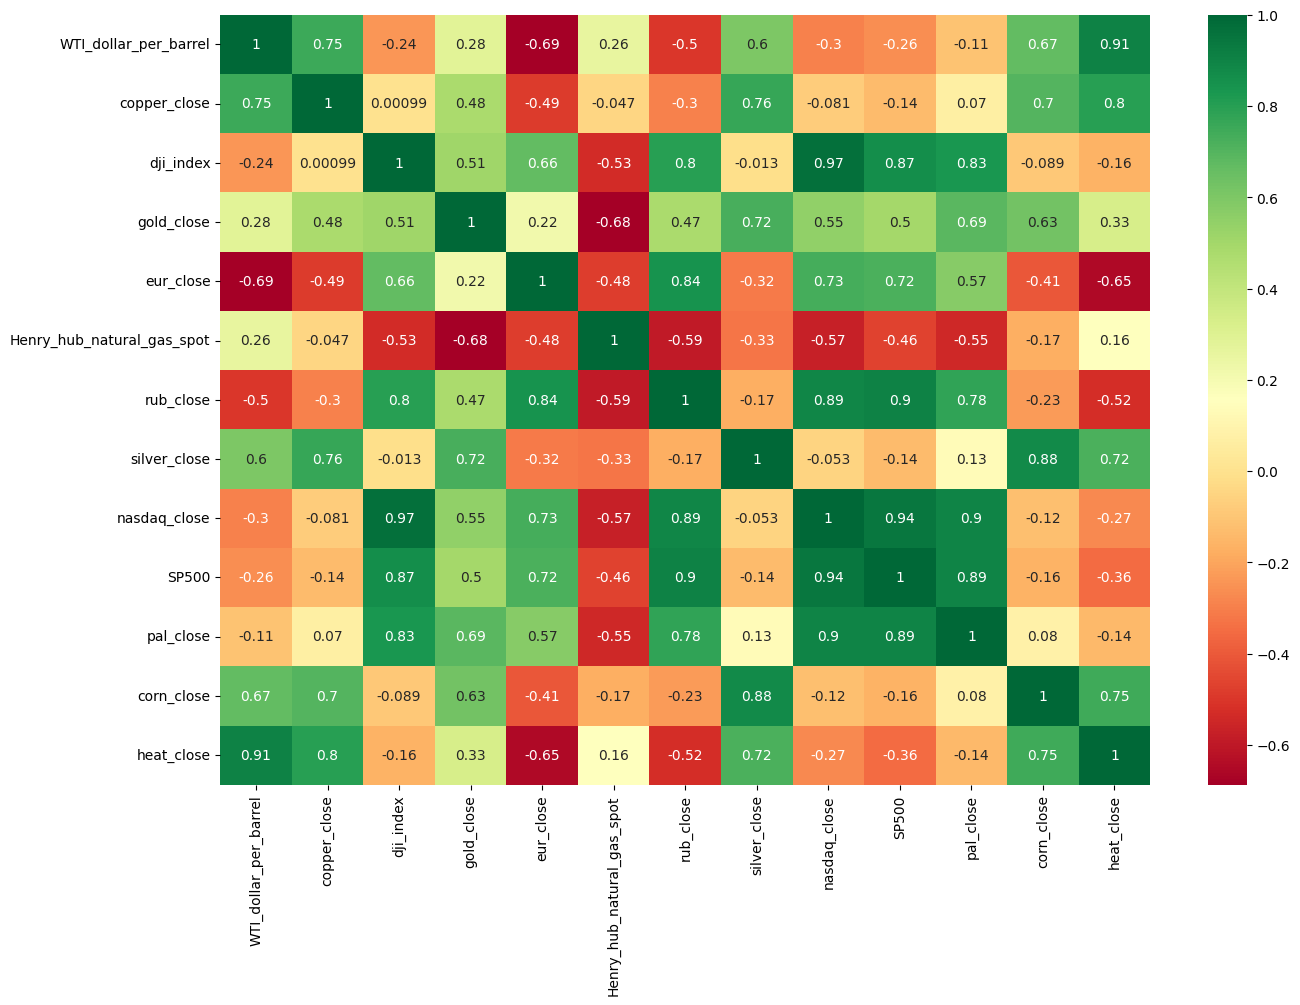

In [63]:
#plot heat map
pyplot.figure(figsize=(15,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Conclusion

**Features that have some correlation (+ve/-ve) with WTI price are:**

- heat_close (0.91)
- copper (+0.75)
- eur_close (-0.69)
- corn_close (0.67)
- silver_close (0.6)

We can take the top 3 features that have the highest correlation

## HeatMap with Scaling

In [68]:
#get correlations of each features in dataset
corrmat_normalized = normalized_data.corr()
top_corr_features_normalized = corrmat_normalized.index

In [69]:
top_corr_features_normalized

Index(['WTI_dollar_per_barrel', 'copper_close', 'dji_index', 'gold_close',
       'eur_close', 'Henry_hub_natural_gas_spot', 'rub_close', 'silver_close',
       'nasdaq_close', 'SP500', 'pal_close', 'corn_close', 'heat_close'],
      dtype='object')

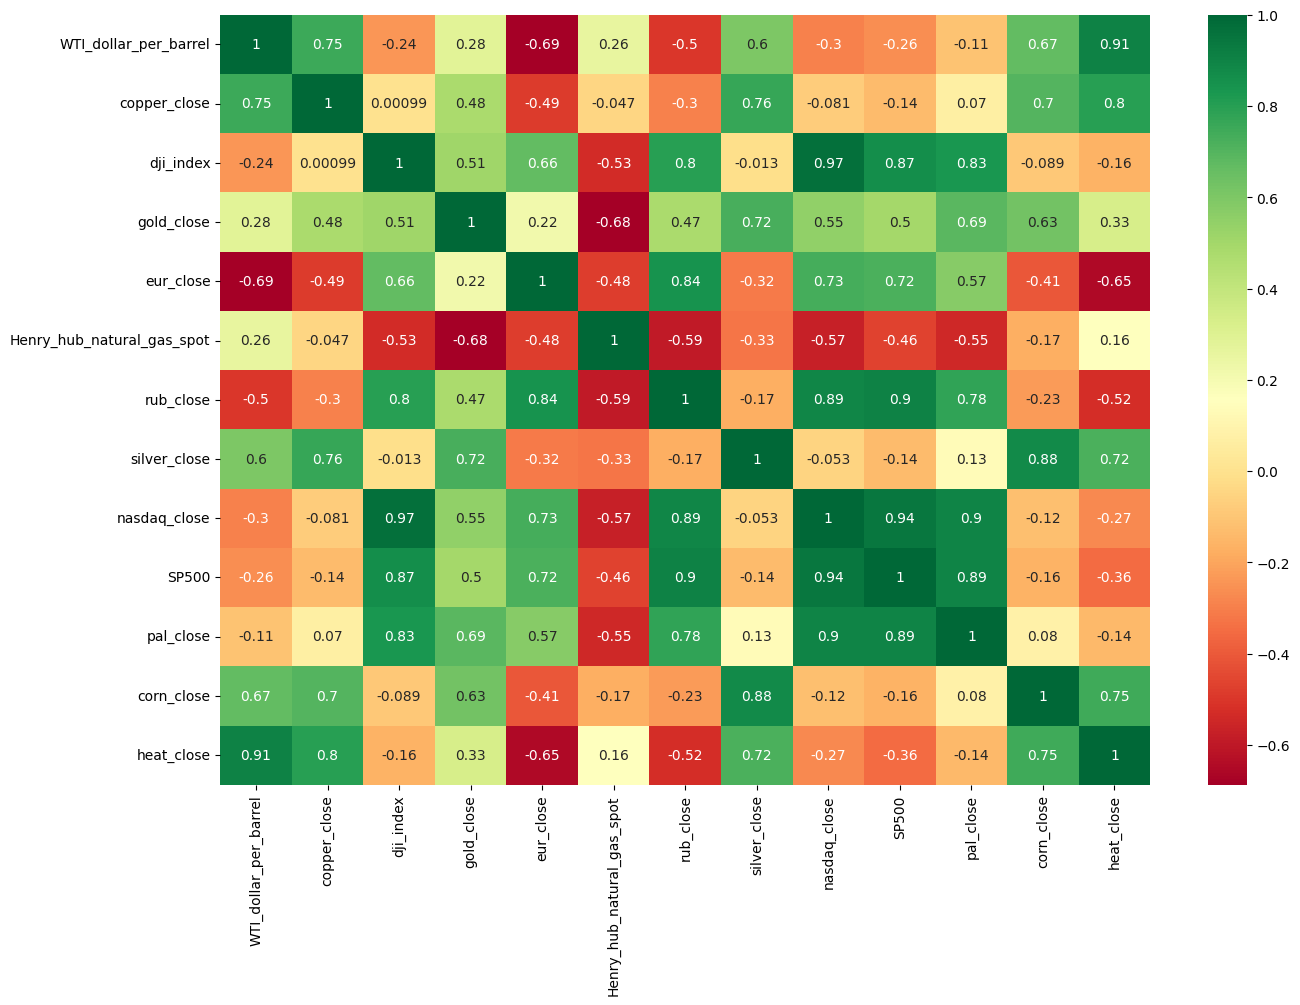

In [70]:
#plot heat map
pyplot.figure(figsize=(15,10))
g_normalized=sns.heatmap(normalized_data[top_corr_features_normalized].corr(),annot=True,cmap="RdYlGn")